# Práctico 3 - Regresiones

## Diabetes dataset

Un dataset provisto por sklearn utilizado para el entrenamiento de distintos algoritmos de machine learning, contiene información acerca de 442 pacientes con diabetes, y una medida de la progresión de la enfermedad al cabo de un año desde el baseline.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
from sklearn.datasets import load_diabetes

data_bulk = load_diabetes(return_X_y=False)
df = pd.DataFrame(data_bulk.data, columns = data_bulk.feature_names)
df['target'] = data_bulk.target

In [3]:
data_bulk

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [4]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


NOTA: Los datos están estandarizados, interpretarlos directamente no tiene un sentido real.

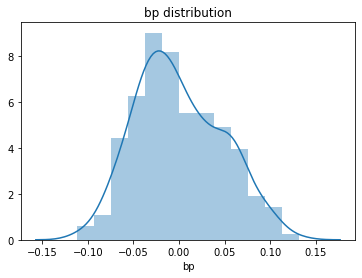

In [ ]:
sns.distplot(df["bp"])
plt.title("bp distribution");

#### Descripción de los datos

* age - age in years
* sex
* bmi - body mass index
* bp - average blood pressure
* s1 - tc, total serum cholesterol
* s2 - ldl, low-density lipoproteins
* s3 - hdl, high-density lipoproteins
* s4 - tch, total cholesterol / HDL
* s5 - ltg, possibly log of serum triglycerides level
* s6 - glu, blood sugar level
* target - Column 11 is a quantitative measure of disease progression one year after baseline

fuentes: 
* [Diabetes Dataset - sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html#sklearn.datasets.load_diabetes)
* [Diabetes data](https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html)

In [48]:
df.describe().apply(lambda s: s.apply('{0:.5f}'.format))

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,442.00000,442.00000,442.00000,442.00000,442.00000,442.00000,442.00000,442.00000,442.00000,442.00000,442.00000
mean,-0.00000,0.00000,-0.00000,-0.00000,-0.00000,0.00000,-0.00000,-0.00000,0.00000,0.00000,152.13348
std,0.04762,0.04762,0.04762,0.04762,0.04762,0.04762,0.04762,0.04762,0.04762,0.04762,77.09300
min,-0.10723,-0.04464,-0.09028,-0.11240,-0.12678,-0.11561,-0.10231,-0.07639,-0.12610,-0.13777,25.00000
25%,-0.03730,-0.04464,-0.03423,-0.03666,-0.03425,-0.03036,-0.03512,-0.03949,-0.03325,-0.03318,87.00000
50%,0.00538,-0.04464,-0.00728,-0.00567,-0.00432,-0.00382,-0.00658,-0.00259,-0.00195,-0.00108,140.50000
75%,0.03808,0.05068,0.03125,0.03564,0.02836,0.02984,0.02931,0.03431,0.03243,0.02792,211.50000
max,0.11073,0.05068,0.17056,0.13204,0.15391,0.19879,0.18118,0.18523,0.13360,0.13561,346.00000


## Ejercicio 2
Elimine una de estas variables del dataframe. ¿Por qué hacemos esto? ¿Cree que siempre es necesario hacerlo? Justifique.

<Axes: >

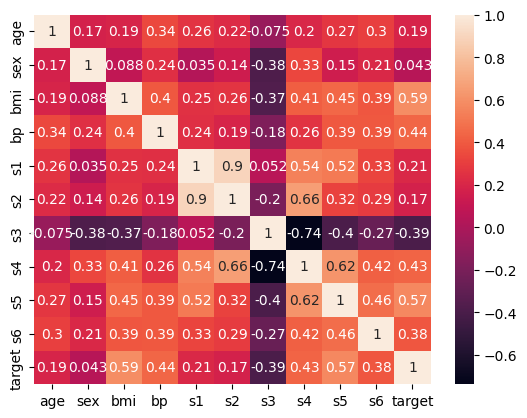

In [39]:
import seaborn as sns
sns.heatmap(df.corr(), annot=True)

In [49]:
corr = df.corr()
mat = corr.to_numpy()
det = np.linalg.det(mat)
print("Determinante de la matriz de correlación: ", det)

Determinante de la matriz de correlación:  0.00020779722231835883


 The value for the determinant is an important test for multicollinearity or singularity. 

In [3]:
df = df.drop(columns="s1")
df.columns

Index(['age', 'sex', 'bmi', 'bp', 's2', 's3', 's4', 's5', 's6', 'target'], dtype='object')

In [4]:
corr = df.corr()
mat = corr.to_numpy()
det = np.linalg.det(mat)
print("Determinante de la matriz de correlación: ", det)

Determinante de la matriz de correlación:  0.012405284091587905


### Particionar datos en train y test en proporción 2/3 y 1/3, respectivamente

In [5]:
from sklearn.model_selection import train_test_split
random_state = 117

X, y = df.loc[:, df.columns != 'target'], df["target"]
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=(1.0/3),
    random_state=random_state)

### Entrenamiento

* [Linear Model - sklearn](https://scikit-learn.org/stable/modules/linear_model.html)
* [Linear Model Ridge - sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html)

In [6]:
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

LinearRegression()

Coeficientes

In [7]:
regr.coef_

array([  45.96032058, -318.7094892 ,  531.80812651,  334.4850064 ,
       -117.19042482, -367.47402329,   66.14518711,  309.48714903,
        103.17445012])

In [13]:
regr.intercept_

151.05687998254956

In [17]:
score = regr.score(X_test, y_test)
print("R-squared score on training data:", score)


R-squared score on training data: 0.45741355434308884


Coeficiente de determinacion: R-Squared (R² or the coefficient of determination) is a statistical measure in a regression model that determines the proportion of variance in the dependent variable that can be explained by the independent variable. In other words, r-squared shows how well the data fit the regression model (the goodness of fit).

In [19]:
RSS = np.sum(np.square(y_test - regr.predict(X_test)))
TSS = np.sum(np.square(y_test - np.mean(y_test)))
R2 = 1 - RSS/TSS
print("R-squared score on training data:", R2)

R-squared score on training data: 0.45741355434308884


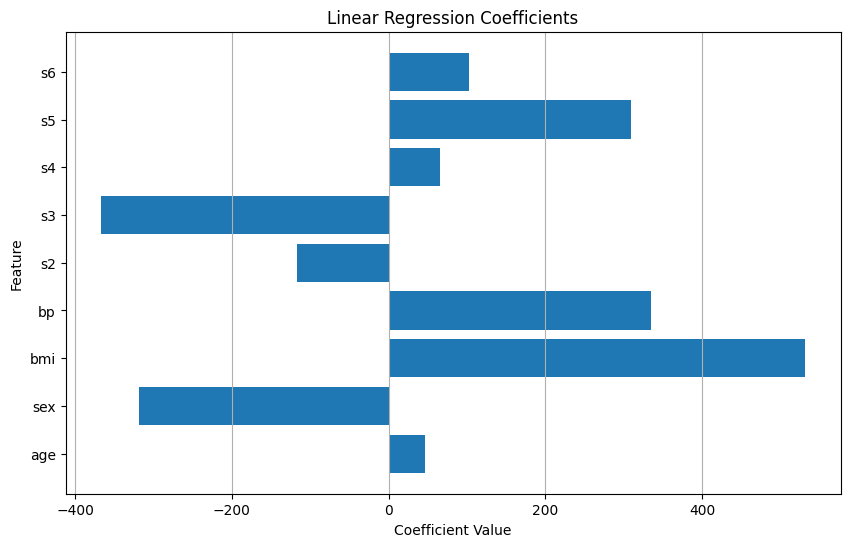

In [16]:
feature_names = X_train.columns.tolist()
coefficients = regr.coef_.tolist()

plt.figure(figsize=(10, 6))
plt.barh(feature_names, coefficients)
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Linear Regression Coefficients')
plt.grid(axis='x')
plt.show()

In [12]:
from sklearn.linear_model import Lasso

regr_l1 = Lasso(alpha=0.1)
regr_l1.fit(X_train, y_train)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [13]:
regr_l1.coef_

array([   1.10164403, -230.4438823 ,  533.80909389,  293.94456474,
        -15.47670724, -327.27966092,    0.        ,  330.61733207,
         66.04526179])

In [14]:
df.corr()

,age,sex,bmi,bp,s2,s3,s4,s5,s6,target
age,1.000000,0.173737,0.185085,0.335427,0.219243,-0.075181,0.203841,0.270777,0.301731,0.187889
sex,0.173737,1.000000,0.088161,0.241013,0.142637,-0.379090,0.332115,0.149918,0.208133,0.043062
bmi,0.185085,0.088161,1.000000,0.395415,0.261170,-0.366811,0.413807,0.446159,0.388680,0.586450
bp,0.335427,0.241013,0.395415,1.000000,0.185558,-0.178761,0.257653,0.393478,0.390429,0.441484
s2,0.219243,0.142637,0.261170,0.185558,1.000000,-0.196455,0.659817,0.318353,0.290600,0.174054
s3,-0.075181,-0.379090,-0.366811,-0.178761,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
s4,0.203841,0.332115,0.413807,0.257653,0.659817,-0.738493,1.000000,0.617857,0.417212,0.430453
s5,0.270777,0.149918,0.446159,0.393478,0.318353,-0.398577,0.617857,1.000000,0.464670,0.565883
s6,0.301731,0.208133,0.388680,0.390429,0.290600,-0.273697,0.417212,0.464670,1.000000,0.382483
target,0.187889,0.043062,0.586450,0.441484,0.174054,-0.394789,0.430453,0.565883,0.382483,1.000000


In [15]:
from sklearn.linear_model import Ridge, Lasso

regr_l2 = Ridge(alpha=1.0)
regr_l2.fit(X_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [16]:
regr_l2.coef_

array([  56.50035101,  -91.89645415,  264.73296662,  169.58929385,
        -10.99132112, -147.69729935,  112.30601455,  198.69693416,
        105.61804295])

### Evaluación

In [17]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

y_pred = regr.predict(X_test)
y_pred_l1 = regr_l1.predict(X_test)
y_pred_l2 = regr_l2.predict(X_test)

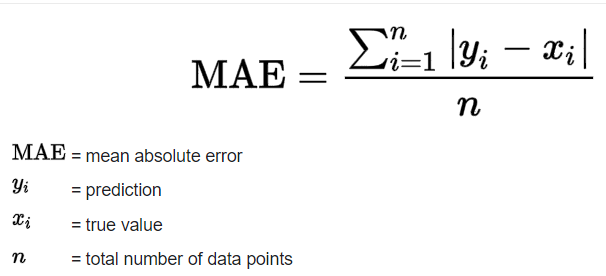

In [18]:
print("MAE")
print("===\n")
print(f'(base regresssion) = {mean_absolute_error(y_test, y_pred)}')
print(f'(Lasso) = {mean_absolute_error(y_test, y_pred_l1)}')
print(f'(Ridge) = {mean_absolute_error(y_test, y_pred_l2)}')

MAE
===

(base regresssion) = 47.9202147369437
(Lasso) = 47.82501176762487
(Ridge) = 52.349881160317906


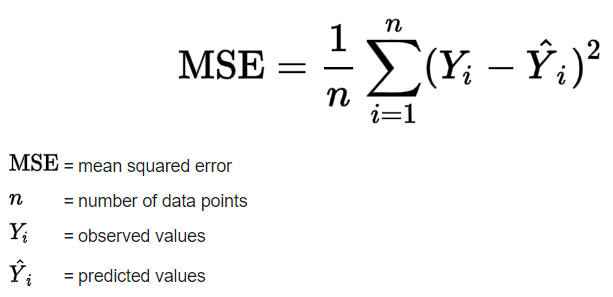

In [19]:
print("MSE")
print("===\n")
print(f'(base regresssion) = {mean_squared_error(y_test, y_pred)}')
print(f'(Lasso) = {mean_squared_error(y_test, y_pred_l1)}')
print(f'(Ridge) = {mean_squared_error(y_test, y_pred_l2)}')

MSE
===

(base regresssion) = 3491.88278923739
(Lasso) = 3428.0249470451945
(Ridge) = 3891.5494895714346


#### K-Fold Cross Validation

In [20]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(regr, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
scores_l1 = cross_val_score(regr_l1, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
scores_l2 = cross_val_score(regr_l2, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

In [21]:
print("MSE (k-folds)")
print("===========\n")
print(f'(base regresssion) = {np.mean(scores)}')
print(f'(Lasso) = {np.mean(scores_l1)}')
print(f'(Ridge) = {np.mean(scores_l2)}')

MSE (k-folds)

(base regresssion) = -2852.3003743938575
(Lasso) = -2843.0016725707346
(Ridge) = -3437.860043322277


In [23]:
for alpha in [0.0001, 0.001, 0.01, .1, .3, .5, .7, .9, 1]:
  reg_l1_aux = Lasso(alpha=alpha)
  scores_l1_aux = cross_val_score(reg_l1_aux, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
  print(f'(alpha) = {alpha} (mean score) = {np.mean(scores_l1_aux)}')

(alpha) = 0.0001 (mean score) = -2852.176384039941
(alpha) = 0.001 (mean score) = -2851.0665634678444
(alpha) = 0.01 (mean score) = -2841.2099862169484
(alpha) = 0.1 (mean score) = -2843.0016725707346
(alpha) = 0.3 (mean score) = -3020.09331602154
(alpha) = 0.5 (mean score) = -3198.0168600140205
(alpha) = 0.7 (mean score) = -3420.383037940593
(alpha) = 0.9 (mean score) = -3666.1324665714187
(alpha) = 1 (mean score) = -3795.5499024318706


In [24]:
for alpha in [0.0001, 0.001, 0.01, .1, .3, .5, .7, .9, 1]:
  reg_l2_aux = Ridge(alpha=alpha)
  scores_l2_aux = cross_val_score(reg_l2_aux, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
  print(f'(alpha) = {alpha} (mean score) = {np.mean(scores_l2_aux)}')

(alpha) = 0.0001 (mean score) = -2852.1049703227322
(alpha) = 0.001 (mean score) = -2850.397224777069
(alpha) = 0.01 (mean score) = -2837.245342899684
(alpha) = 0.1 (mean score) = -2824.079357114376
(alpha) = 0.3 (mean score) = -2945.1868482690115
(alpha) = 0.5 (mean score) = -3096.736508634952
(alpha) = 0.7 (mean score) = -3242.3180993881233
(alpha) = 0.9 (mean score) = -3375.807806328144
(alpha) = 1 (mean score) = -3437.860043322277


In [25]:
regr_sel = Ridge(alpha=0.1)
regr_sel.fit(X_train, y_train)
y_pred_sel = regr_sel.predict(X_test)

In [26]:
regr_sel.coef_

array([  46.47147841, -311.76646806,  526.87529167,  330.02858433,
       -119.33753279, -353.94548094,   78.24122992,  306.18167767,
        103.97710265])

In [27]:
np.sum(np.square(regr_sel.coef_))

736073.3662521566

In [28]:
regr.coef_

array([  45.95879728, -318.71387043,  531.80227929,  334.49643095,
       -117.19490014, -367.47297966,   66.15454637,  309.47894263,
        103.1731715 ])

In [29]:
np.sum(np.square(regr.coef_))

757961.6474814417

This is sometimes used as a way to measure the overall complexity or "size" of the coefficients in a linear regression model. It can be useful for regularization techniques or for assessing the importance of features in the model. Higher values indicate larger coefficients, which might imply that certain features have more influence on the model's predictions.

In [30]:
print("MSE")
print("===\n")
print(f'(base regresssion) = {mean_squared_error(y_test, y_pred)}')
print(f'(Ridge) = {mean_squared_error(y_test, y_pred_sel)}')

MSE
===

(base regresssion) = 3491.88278923739
(Ridge) = 3485.1443313888


## Houses price prediction

Este dataset contiene datos y precios de casas de King County, Washington. Los datos refieren a casas vendidas entre mayo de 2014 y mayo de 2015.